In [1]:
import pandas as pd

# Specify the full file path to the CSV file
file_path = r'C:\Users\Admin\Downloads\anime.csv'  # Use raw string to avoid escaping backslashes

# Read the CSV file
prod = pd.read_csv(file_path)
# print(prod)

cols = list(prod.columns)
print(cols)

['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio', 'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year', 'Description', 'Content_Warning', 'Related_Mange', 'Related_anime', 'Voice_actors', 'staff']


In [1]:
# !pip install wordcloud
# !pip install seaborn
# pip install matplotlib

#for each year
- Best Anime for each year (top 1,2,3)

#for each season release
- Best Anime for each release

#for each type of medium
- Best Anime for each medium

#for each studio
- Best anime for each studio (ever produce) can see based on rating
- Average rating for each studio

#for each anime
- Average episode for every anime




SyntaxError: invalid syntax (3670853342.py, line 2)

In [ ]:
#TEST

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Specify the full file path to the CSV file
file_path = r'C:\Users\Admin\Downloads\anime.csv'  # Use raw string to avoid escaping backslashes

# Read the CSV file
prod = pd.read_csv(file_path)

class AnimeAnalyzer:
    
    def __init__(self, anime_data):
        self.anime_data = anime_data
        

    def analyze_anime_types(self):
        anime_types = list(self.anime_data['Type'].unique())
        
        print("Medium to watch anime and number of Anime on its platform")
        print("------------------------")
        type_counts = dict(self.anime_data['Type'].value_counts())
        for key in anime_types:
            print(f"{key} : {type_counts[key]}")
            
            
    def search_name(self, title):
        # check if a particular substring or pattern exists in the strings of a Series (column) of a DataFrame
        # filter based on title given 
        listAnime = self.anime_data [self.anime_data['Name'].str.contains(title, case=False)].head(5)
        
        #check exist or not
        if not listAnime.empty:
            print("\nMatching Anime Titles:")
            print("------------------------")
            for anime in list(listAnime['Name']):   #convert dataframe to list
                print(anime)
        else:
            print("No matching anime found.")
            

    def suggest_anime(self, **kwargs):
        filtered_anime = self.anime_data.copy()  # Create a copy of the original data

        for key, value in kwargs.items():
            if key in self.anime_data.columns:
                # Condition by row (Convert the user input to the appropriate data type (float))           # Filtered by column
                if key == "Release_year":
                    filtered_anime = filtered_anime[filtered_anime[key] == int(value)]
                else:
                    filtered_anime = filtered_anime[filtered_anime[key].astype(float) >= float(value)]

        if not filtered_anime.empty:
            # Sort the DataFrame by 'Release_year' in ascending order and then by 'Rating' in descending order
            filtered_anime = filtered_anime.sort_values(by=['Release_year', 'Rating'], ascending=[True, False]).head(5)

            print("\nSuggested Anime:")
            print("------------------------")

            # Iterate through the rows using iterrows
            for index, row in filtered_anime.iterrows():
                print(f"Name\t: {row['Name']}")
                print(f"Episode\t: {int(row['Episodes'])}")
                print(f"Rating\t: {row['Rating']}")
                print(f"Year\t: {int(row['Release_year'])}\n")

        else:
            print("\nNo anime matching the criteria found.")


    
    def top_anime_of_the_year(self, year):
        top_anime = self.anime_data[self.anime_data['Release_year'] == int(year)].sort_values(by='Rating',ascending = False).head(3)
        if not top_anime.empty:
            print(f"\nTop Anime of {year}:")
            
            count = 1
            for index,row in top_anime.iterrows():
                print(f"{count}) {row['Name']}, ({row['Rating']}) ")
                count += 1
        else:
            print(f"No top anime found for {year}.")
            
            
def main():
    # Load anime dataset
    anime_data = prod
    
    # Create an instance of AnimeAnalyzer
    analyzer = AnimeAnalyzer(anime_data)

    # Perform analysis
    analyzer.analyze_anime_types()
    
    # Search & Display anime based on title
    while True:
        title = input("\nEnter the title of the anime you want to search (or 'q' to quit): ")
        if title.lower() == 'q':
            break
        analyzer.search_name(title)

    # Suggest anime based on (episode, rating, year, type)
    while True:
        print("\n------------------------")
        print("~ Anime Suggestion ~")
        print("------------------------")
        
        episode = input("Enter how many episodes you prefer (or 'q' to quit): ")
        if episode.lower() == 'q':
            break
        rating = input("Enter the rating that you prefer (1.0 - 5.0) (or 'q' to quit): ")
        if rating.lower() == 'q':
            break
        year = input("Enter the year of the anime's release (or 'q' to quit): ")
        if year.lower() == 'q':
            break

        try:
            episode= int(episode)
            rating = float(rating)
            year = int(year)
        except ValueError:
            print("Invalid input. Please enter a valid integer for episodes/year and a valid float for rating.")
            continue  # Skip the current iteration and ask for input again

        analyzer.suggest_anime(Episodes=episode, Rating=rating, Release_year=year)
    
    # Top 3 anime of the year
    while True:
        year = input("\nEnter the year to find the top 3 anime (or 'q' to quit): ")
        if year.lower() == 'q':
            break

        try:
            year = int(year)
        except ValueError:
            print("Invalid input. Please enter a valid integer for the year.")
            continue  # Skip the current iteration and ask for input again

        analyzer.top_anime_of_the_year(year)
        
if __name__ == "__main__":
    main()



Medium to watch anime and number of Anime on its platform
------------------------
TV    : 5446
Web   : 2488
Movie : 3577
OVA   : 2235
Music : 2165
TV Sp : 683
DVD S : 911
Other : 990

Enter the title of the anime you want to search (or 'q' to quit): pokemon

Matching Anime Titles:
------------------------
Pokemon: The Origin
Pokemon: GOTCHA!
Pokemon XY&Z
Pokemon: Twilight Wings
Pokemon Journeys


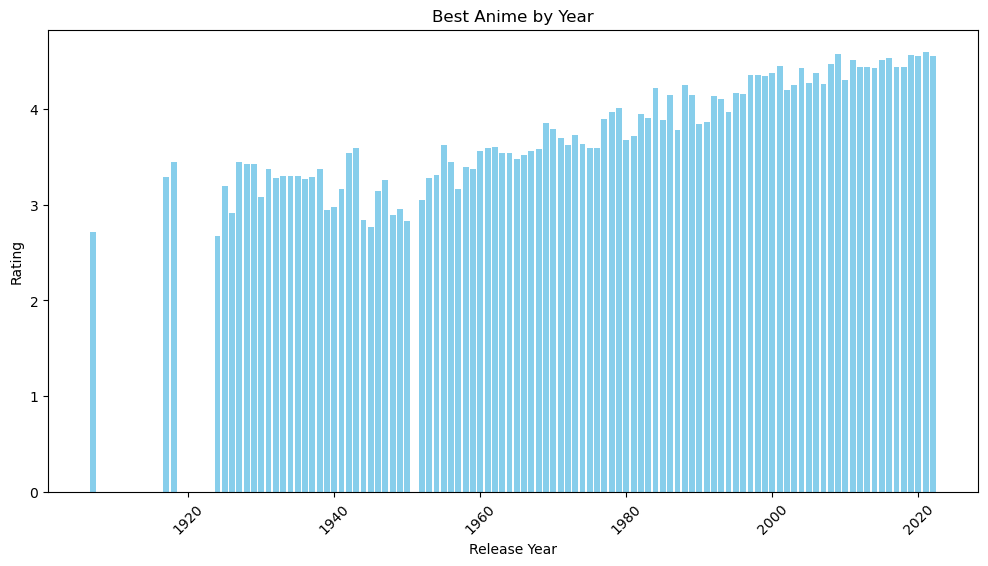

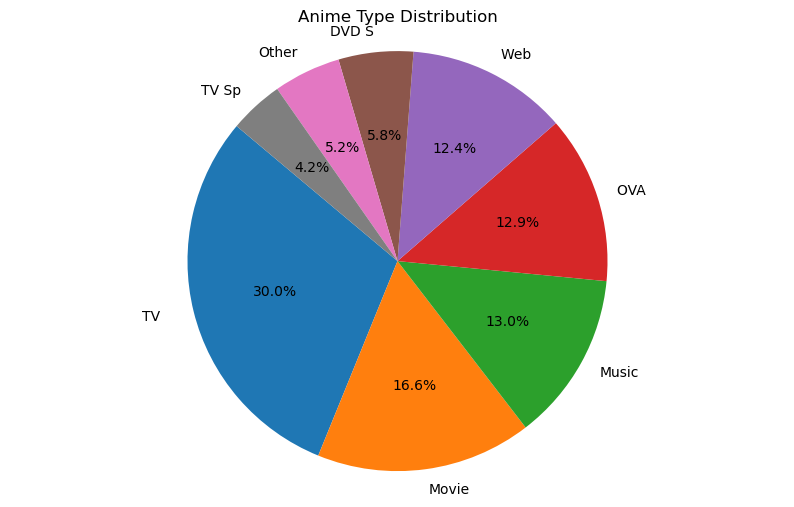

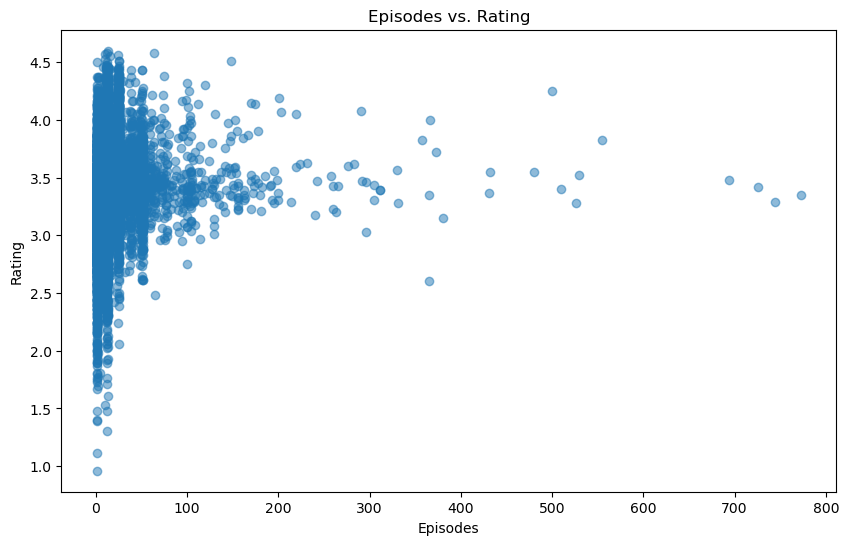

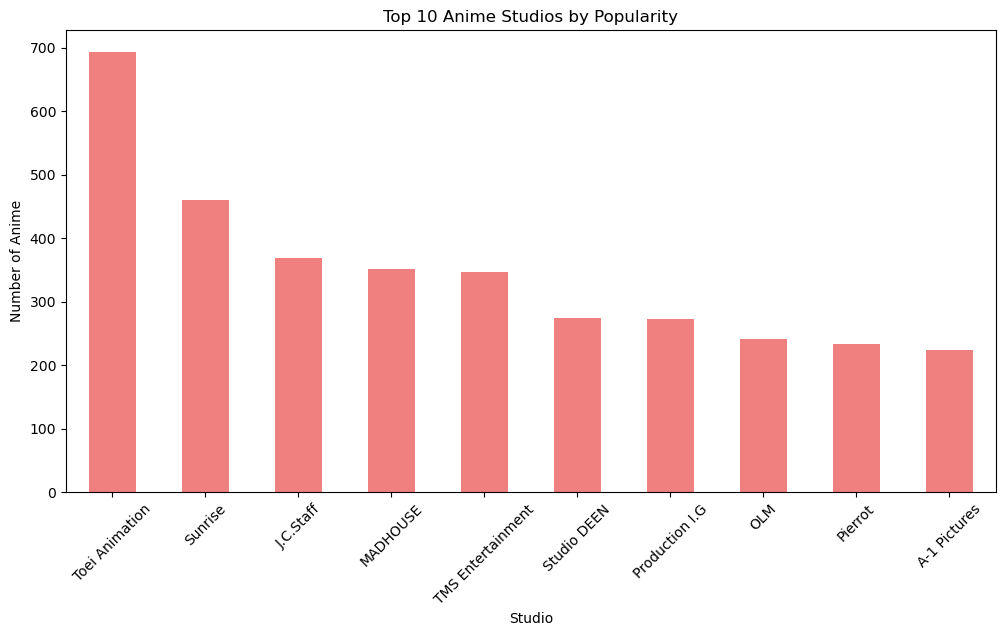

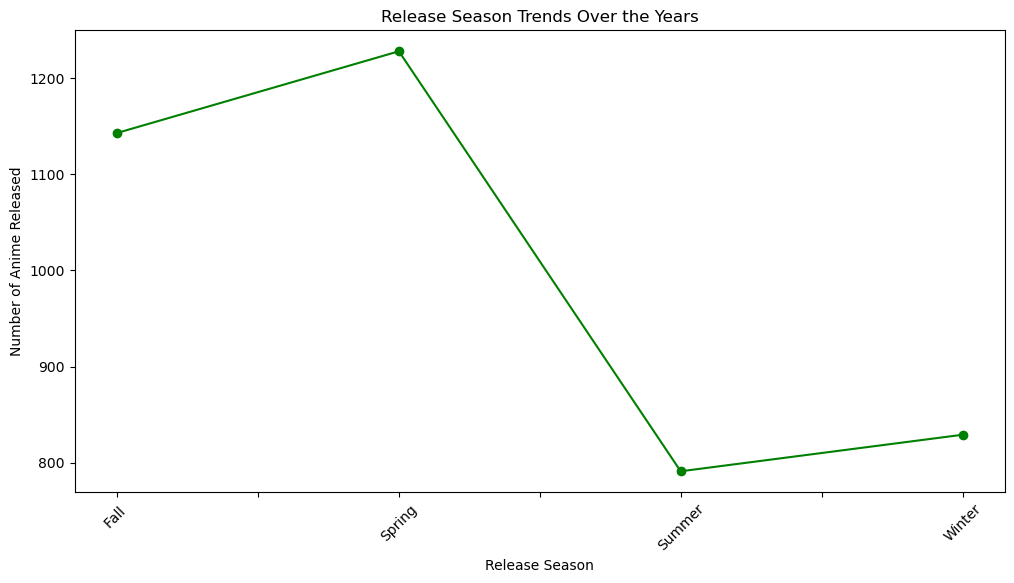

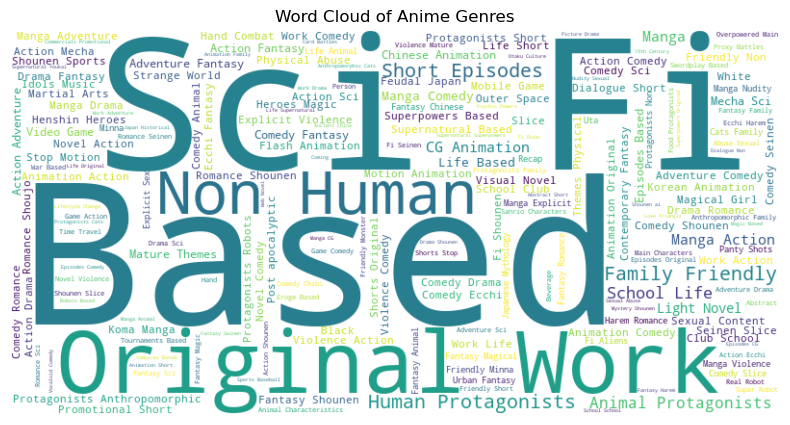

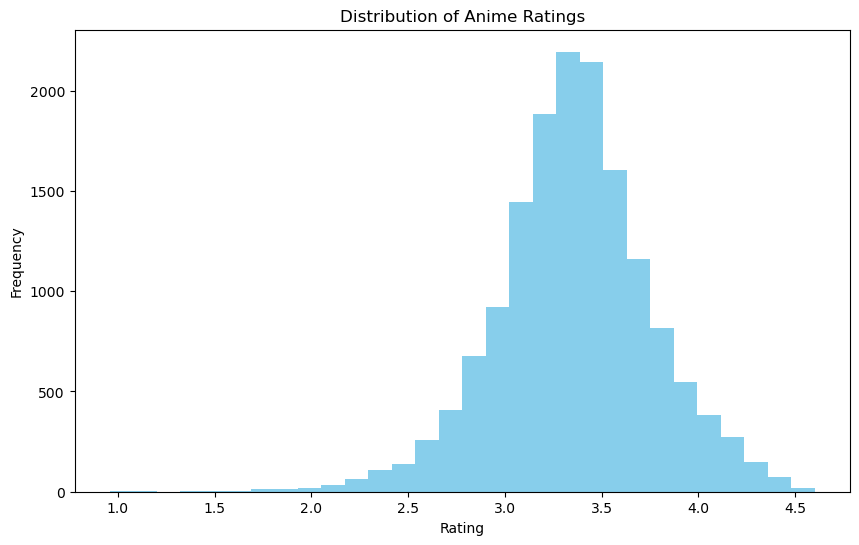

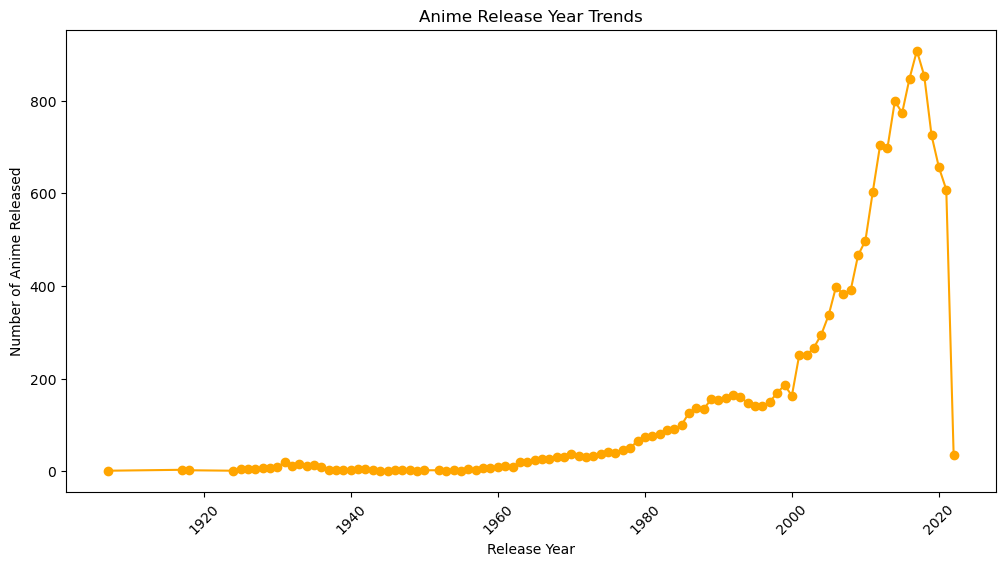

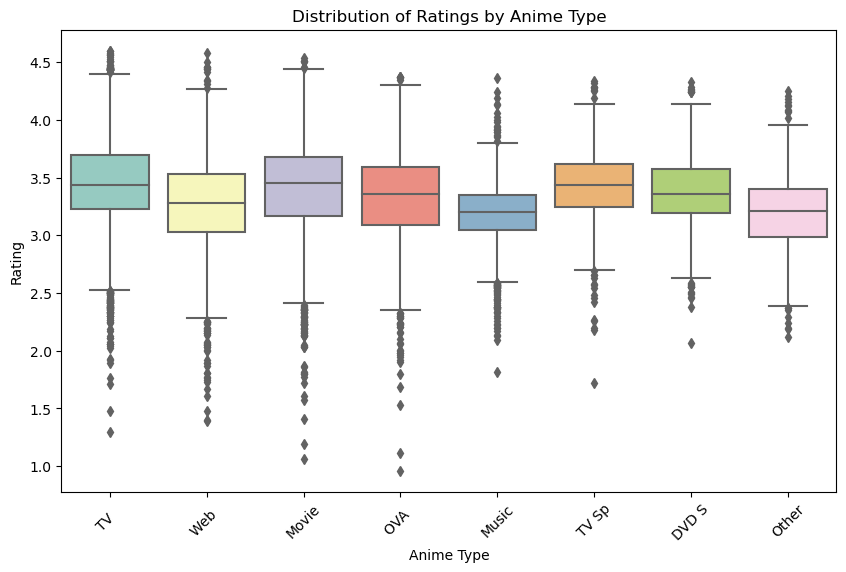

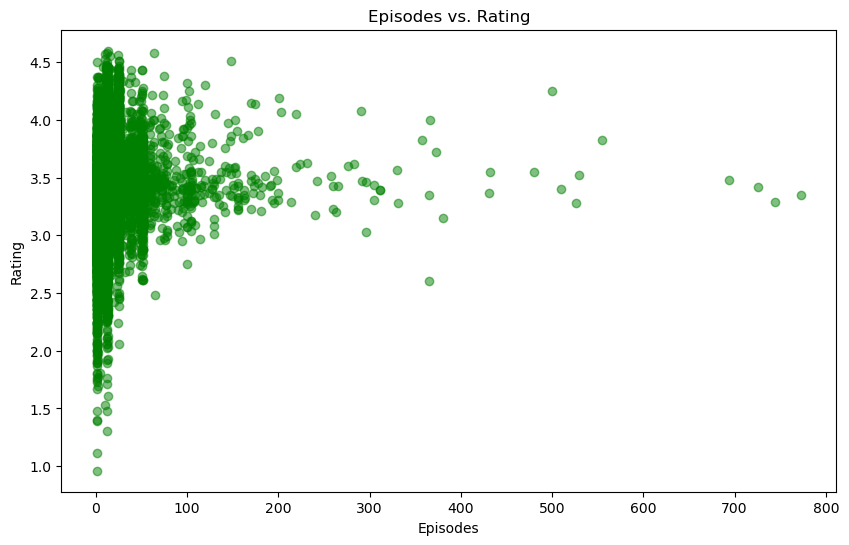

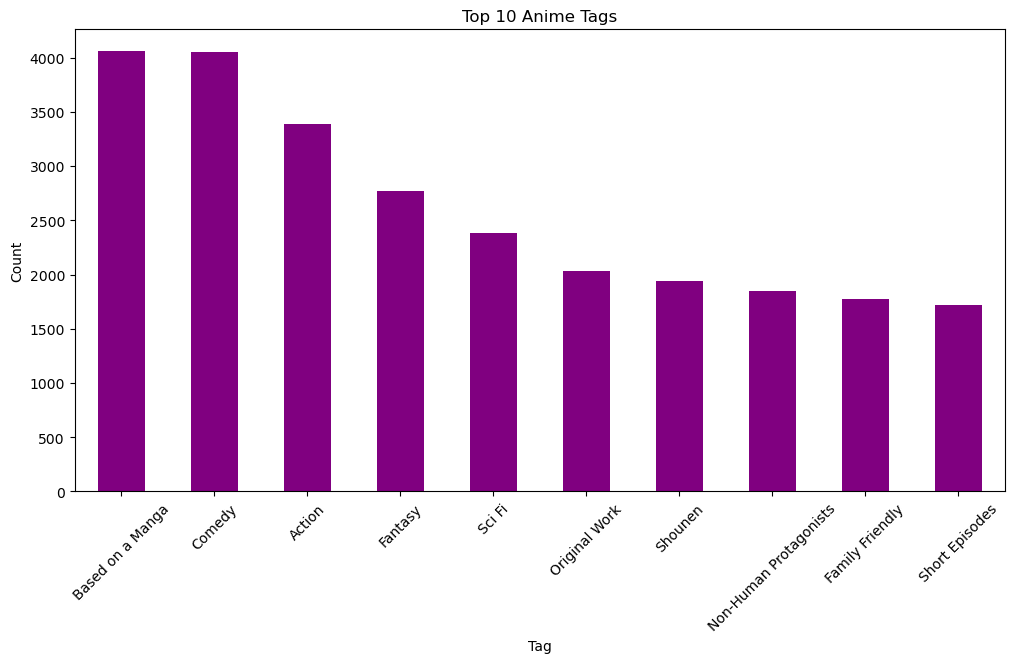

In [28]:
#VISUALISATION OF DATA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Load anime dataset
anime_data = prod
anime_data.dropna(subset=['Rating'], inplace=True)

# Best Anime by Year (Bar Chart)
best_anime_by_year = anime_data.groupby('Release_year')['Rating'].idxmax()
best_anime_data = anime_data.loc[best_anime_by_year, ['Release_year', 'Name', 'Rating']]
plt.figure(figsize=(12, 6))
plt.bar(best_anime_data['Release_year'], best_anime_data['Rating'], color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.title('Best Anime by Year')
plt.xticks(rotation=45)
plt.show()

# Anime Type Distribution (Pie Chart)
anime_type_counts = anime_data['Type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(anime_type_counts, labels=anime_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Anime Type Distribution')
plt.axis('equal')
plt.show()

# Episodes vs. Rating (Scatterplot)
plt.figure(figsize=(10, 6))
plt.scatter(anime_data['Episodes'], anime_data['Rating'], alpha=0.5)
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.title('Episodes vs. Rating')
plt.show()

# Studio Popularity (Bar Chart)
studio_counts = anime_data['Studio'].value_counts().head(10)
plt.figure(figsize=(12, 6))
studio_counts.plot(kind='bar', color='lightcoral')
plt.xlabel('Studio')
plt.ylabel('Number of Anime')
plt.title('Top 10 Anime Studios by Popularity')
plt.xticks(rotation=45)
plt.show()

# Release Season Trends (Line Chart)
season_counts = anime_data.groupby('Release_season')['Rank'].count()
plt.figure(figsize=(12, 6))
season_counts.plot(kind='line', marker='o', color='green')
plt.xlabel('Release Season')
plt.ylabel('Number of Anime Released')
plt.title('Release Season Trends Over the Years')
plt.xticks(rotation=45)
plt.show()

# Genre Analysis (Word Cloud)
from wordcloud import WordCloud

tags_text = ' '.join(anime_data['Tags'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Anime Genres')
plt.show()

#Rating Distribution (Histogram):
plt.figure(figsize=(10, 6))
plt.hist(anime_data['Rating'], bins=30, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Anime Ratings')
plt.show()

#Release Year Trends (Line Chart):
release_year_counts = anime_data['Release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', marker='o', color='orange')
plt.xlabel('Release Year')
plt.ylabel('Number of Anime Released')
plt.title('Anime Release Year Trends')
plt.xticks(rotation=45)
plt.show()

#Anime Types by Rating (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Rating', data=anime_data, palette='Set3')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.title('Distribution of Ratings by Anime Type')
plt.xticks(rotation=45)
plt.show()

# Episodes vs. Rating (Scatterplot)
plt.figure(figsize=(10, 6))
plt.scatter(anime_data['Episodes'], anime_data['Rating'], alpha=0.5, color='green')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.title('Episodes vs. Rating')
plt.show()

#Top 10 Tags
top_tags = anime_data['Tags'].str.split(',').explode().str.strip().value_counts().head(10)
plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='purple')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.title('Top 10 Anime Tags')
plt.xticks(rotation=45)
plt.show()